In [1]:
library(tidyverse)
#import dataframe
df <- read.csv("consumerinsights.csv", header = FALSE, sep=";", stringsAsFactors = FALSE)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
─ Attaching packages ──────────────────── tidyverse 1.2.1 ─
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
─ Conflicts ───────────────────── tidyverse_conflicts() ─
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


V1  V2  V3  V4  V5  V6  V7  V8  V9 V10 V11 V12 V13 V14 V15 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


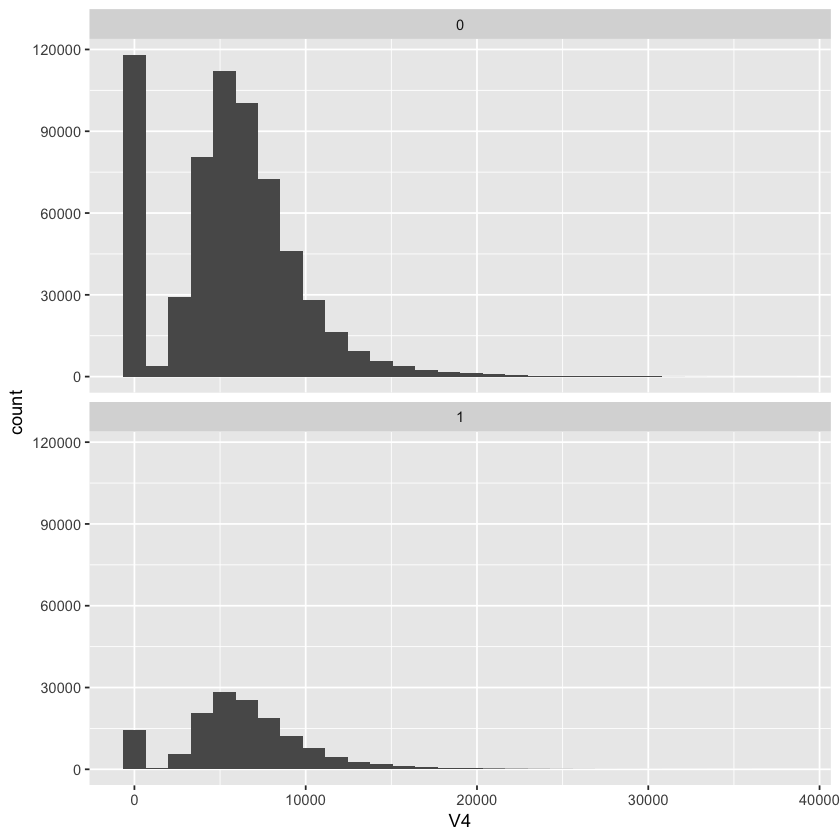

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


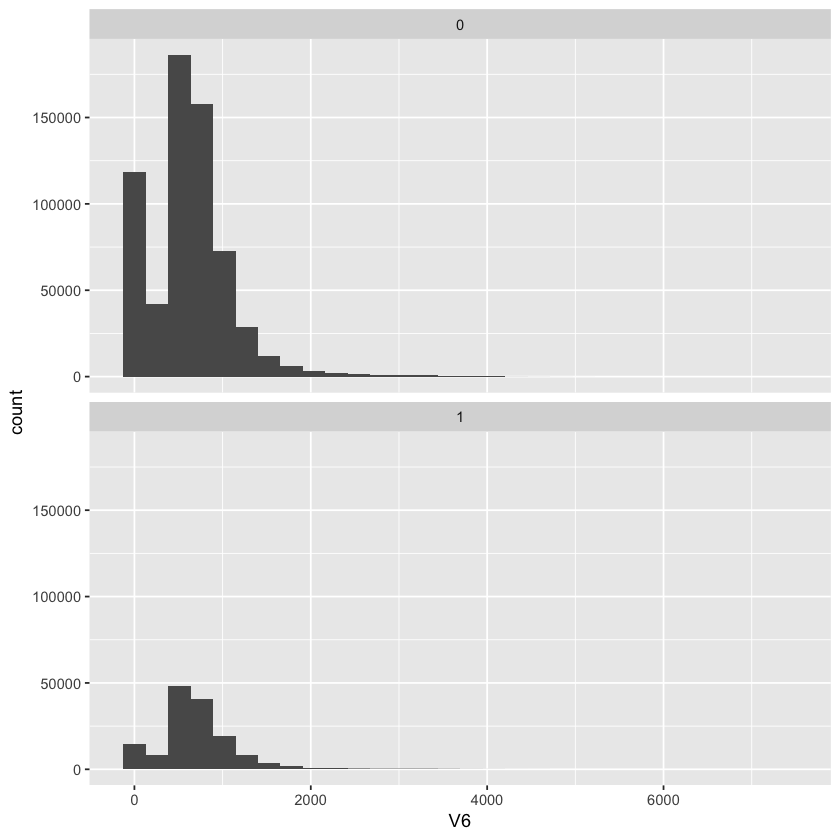

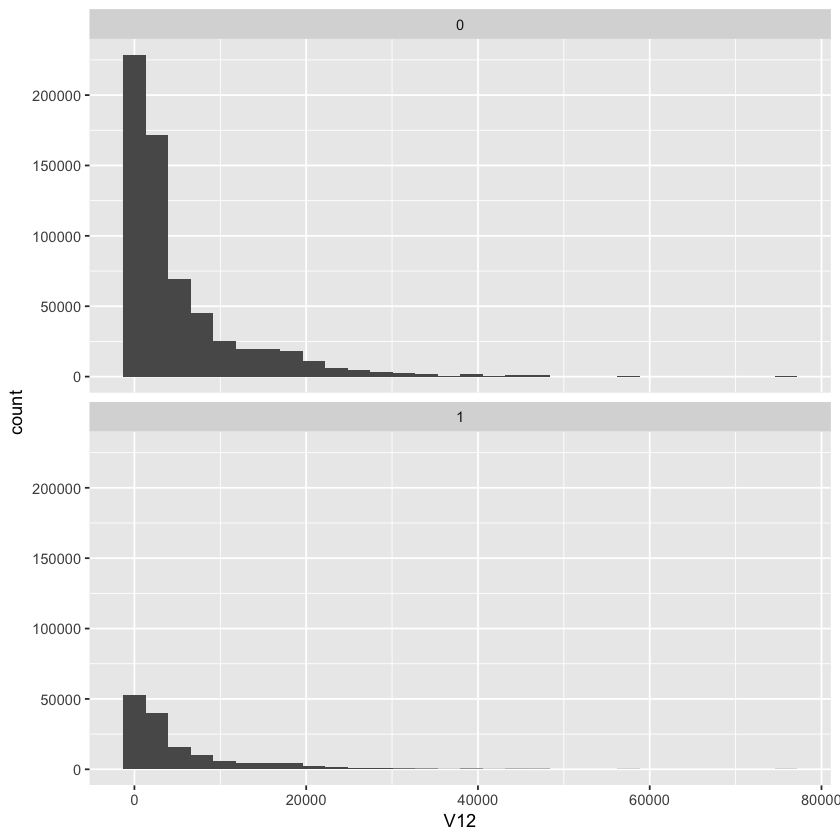

In [2]:
#checking any missing value
sapply(df, function(x) sum(is.na(x)))
#visualization of the data first hand
ggplot(df, aes(V4)) +
  geom_histogram()+
  facet_wrap(~ V9, nrow=2)
ggplot(df, aes(V6)) +
  geom_histogram()+
  facet_wrap(~ V9, nrow=2)
ggplot(df, aes(V12)) +
  geom_histogram()+
  facet_wrap(~ V9, nrow=2)

1 columns ignored with more than 50 categories.
V2: 730 categories



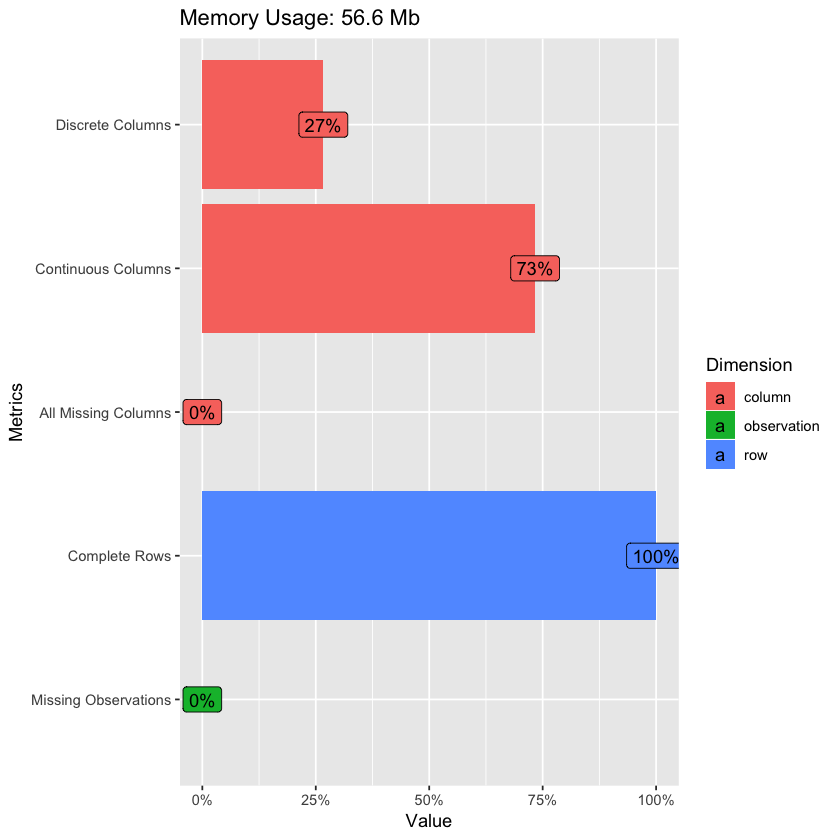

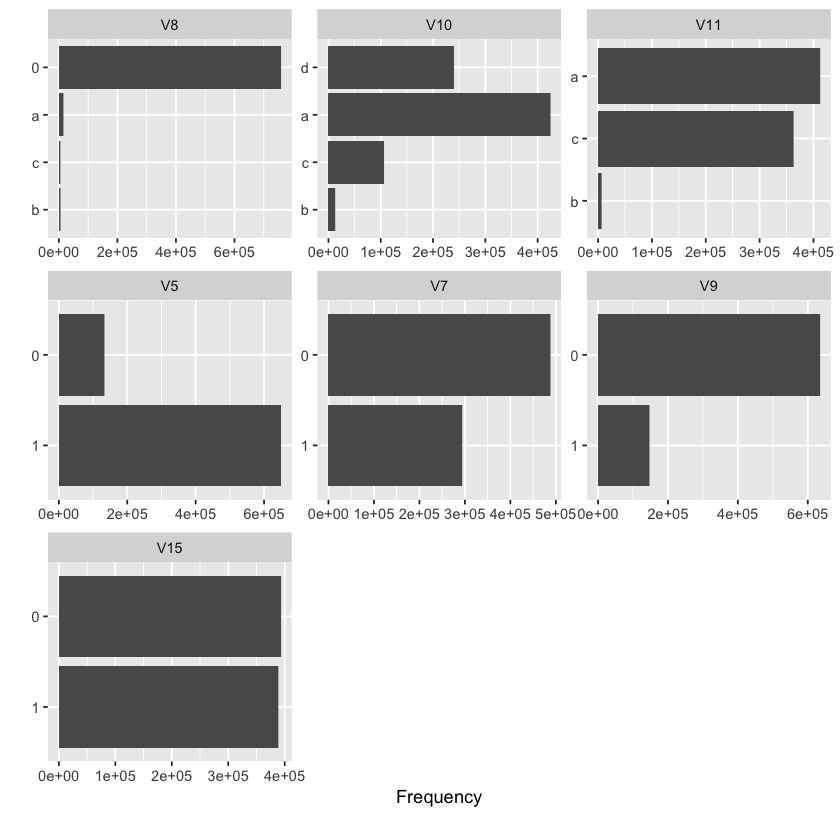

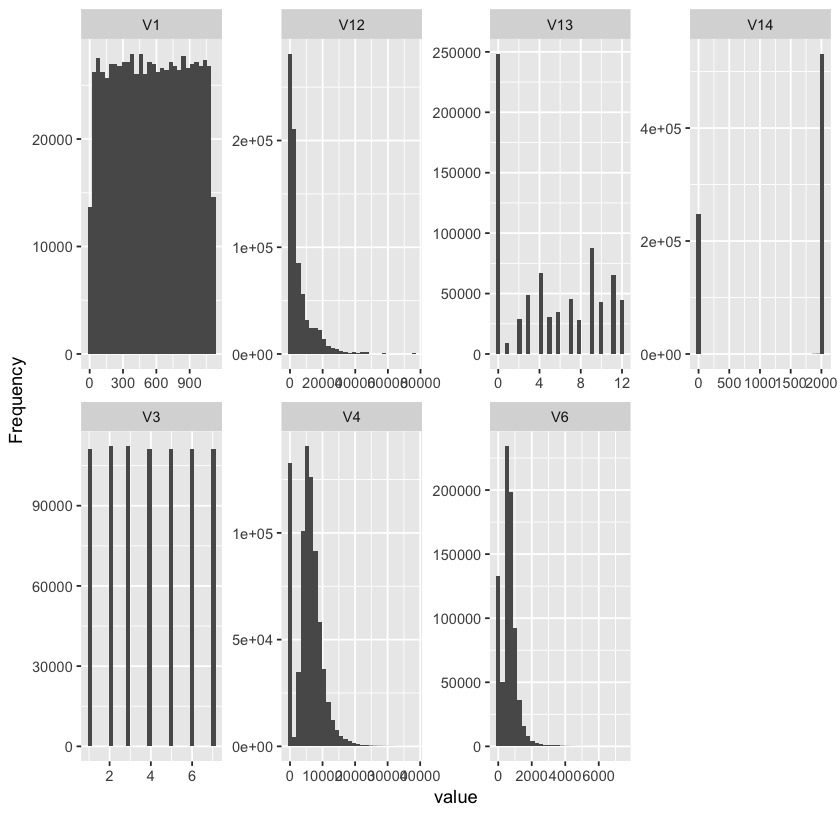

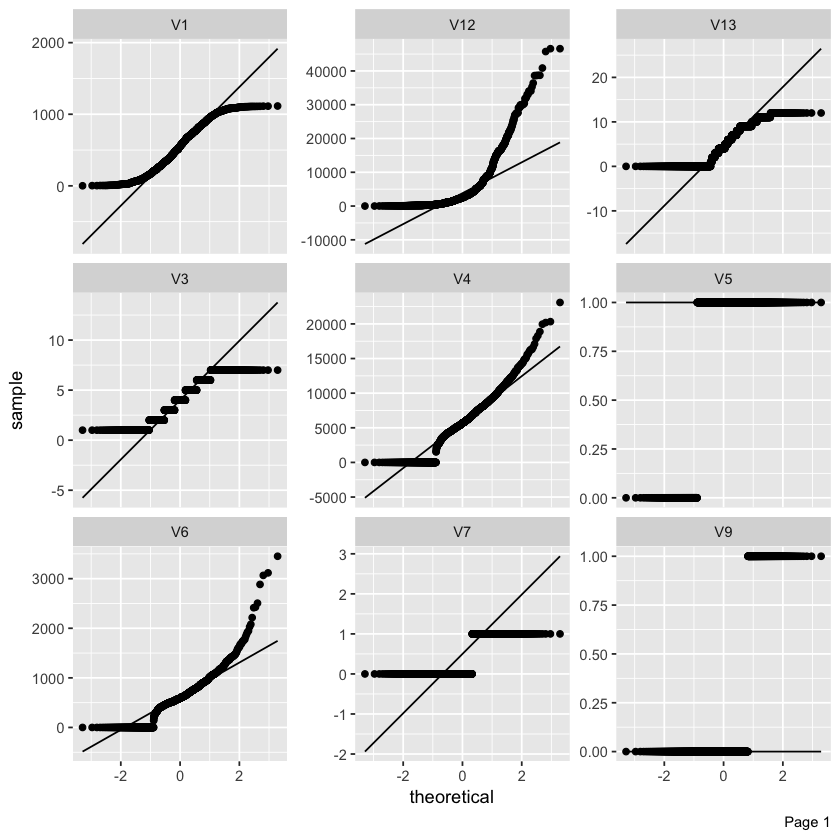

1 features with more than 5 categories ignored!
V2: 730 categories



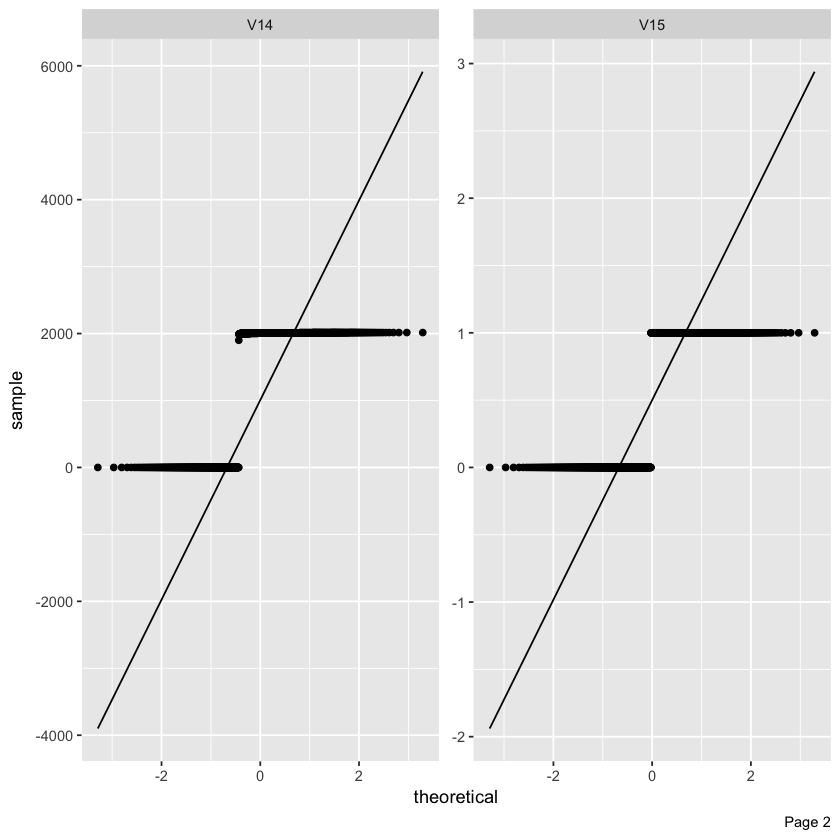

1 features with more than 50 categories ignored!
V2: 730 categories



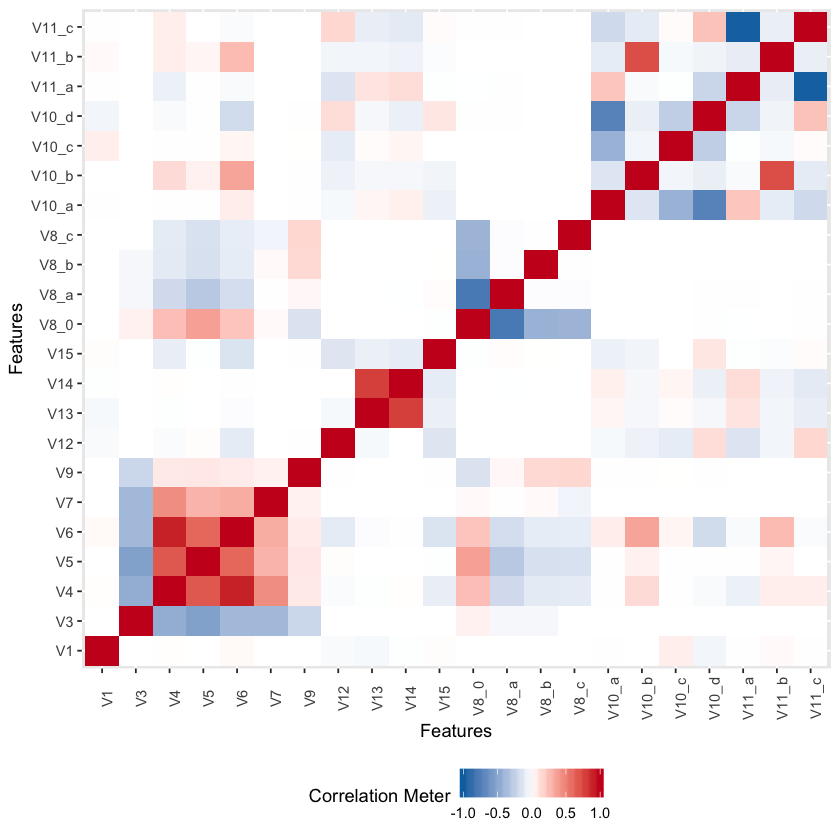

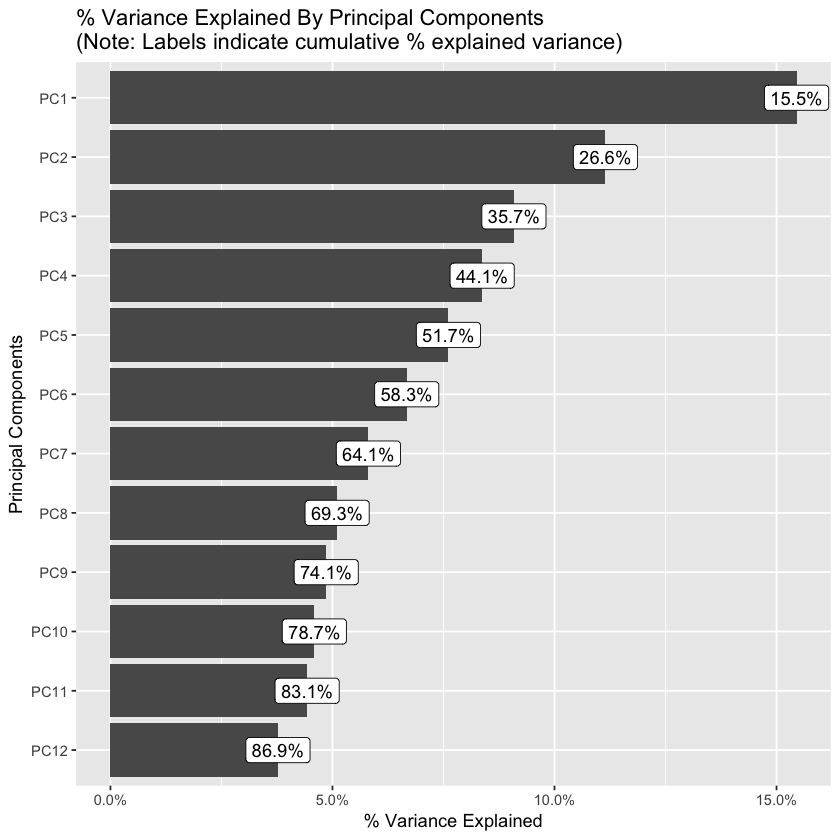

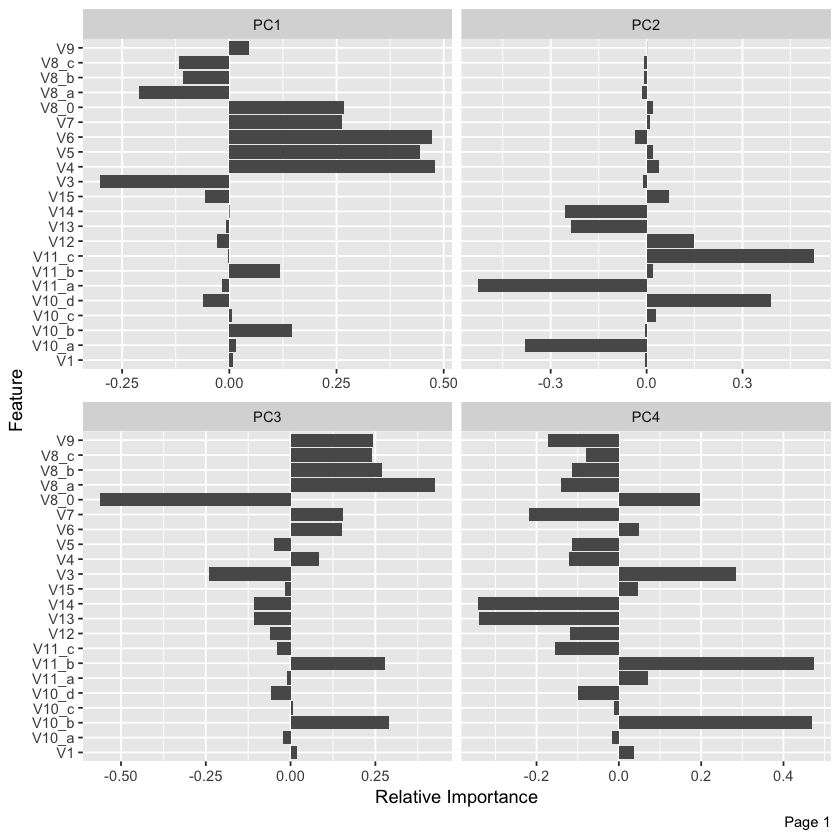

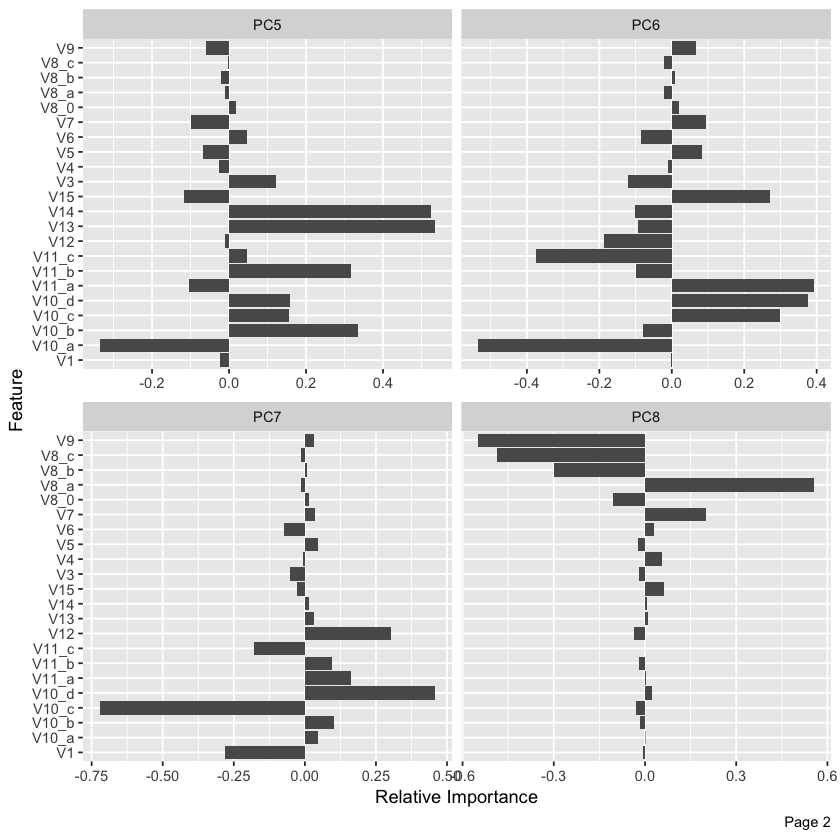

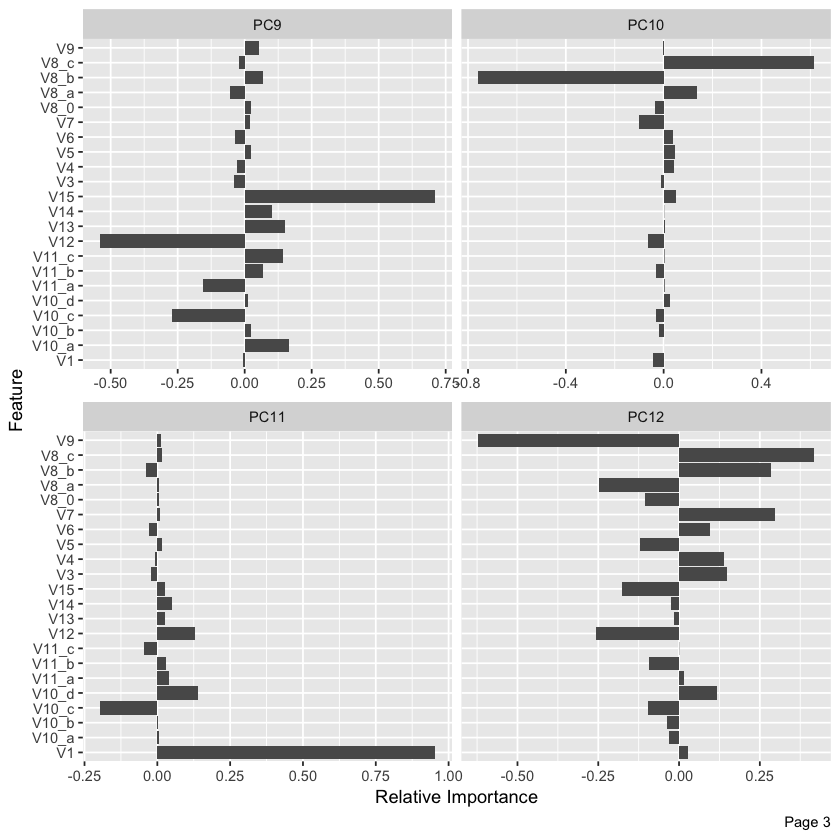

In [3]:
#converting to dates

a<-as.factor(df$V2)
abis<-strptime(a,format="%d.%m.%Y")
b<-as.Date(abis,format="%Y-%m-%d")
df$V2 <- b

#first exploration
library(DataExplorer)
plot_str(df)
plot_intro(df)
plot_bar(df)
plot_histogram(df)
plot_qq(df, sampled_rows = 1000L)
plot_correlation(na.omit(df), maxcat = 5L)
plot_prcomp(df, variance_cap = 0.9, nrow = 2L, ncol = 2L)

In [5]:
#FAMD
library(dplyr)
df2 <- sample_n(df, 100000)

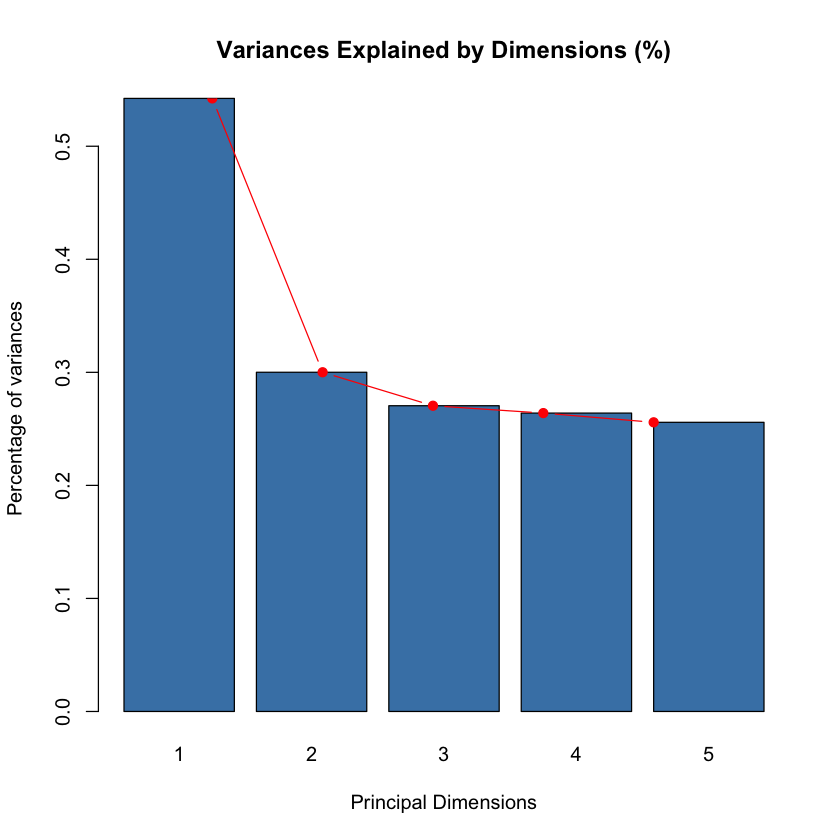

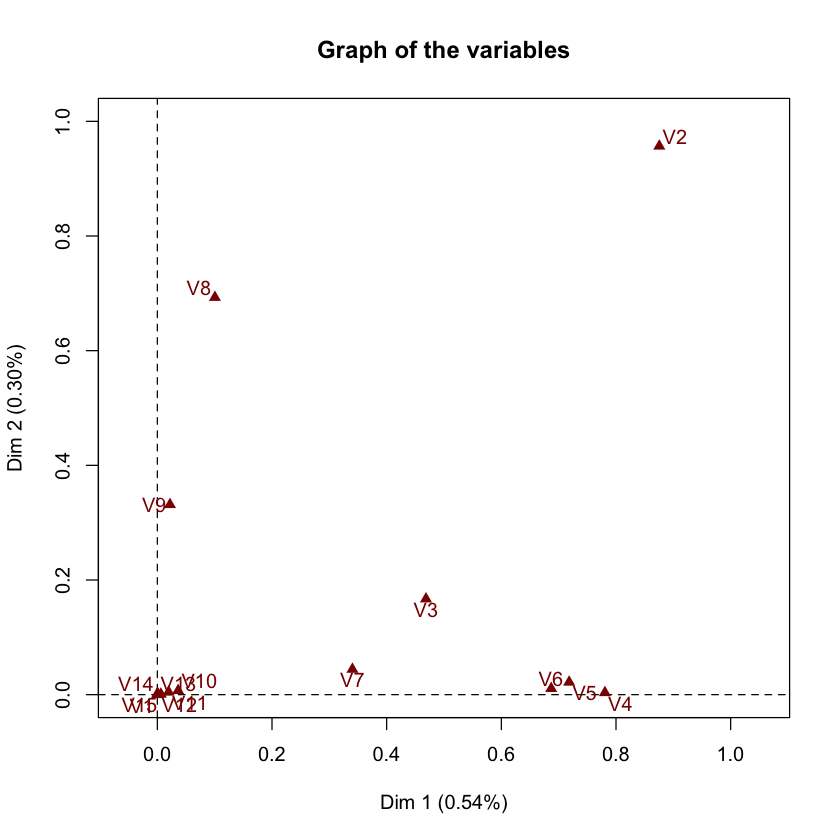


Call:
FAMD(base = df2, graph = FALSE) 


Eigenvalues
                     Dim.1 Dim.2 Dim.3 Dim.4 Dim.5
Variance             4.057 2.244 2.023 1.974 1.913
% of var.            0.542 0.300 0.270 0.264 0.256
Cumulative % of var. 0.542 0.842 1.113 1.377 1.633

Individuals (the 10 first)
               Dist    Dim.1    ctr   cos2    Dim.2    ctr   cos2    Dim.3
1          | 24.184 | -0.961  0.000  0.002 | -1.226  0.001  0.003 |  0.336
2          | 24.929 |  1.586  0.001  0.004 |  0.377  0.000  0.000 | -0.530
3          | 26.569 | -3.840  0.004  0.021 | -0.687  0.000  0.001 | -0.039
4          | 27.582 |  2.301  0.001  0.007 |  1.302  0.001  0.002 | -0.215
5          | 26.515 |  2.969  0.002  0.013 |  1.435  0.001  0.003 | -0.269
6          | 25.347 |  0.965  0.000  0.001 |  0.111  0.000  0.000 | -0.593
7          | 30.107 |  1.689  0.001  0.003 |  0.358  0.000  0.000 | -0.659
8          | 26.637 | -3.860  0.004  0.021 | -0.694  0.000  0.001 | -0.138
9          | 28.638 |  0.716  0.000  0.

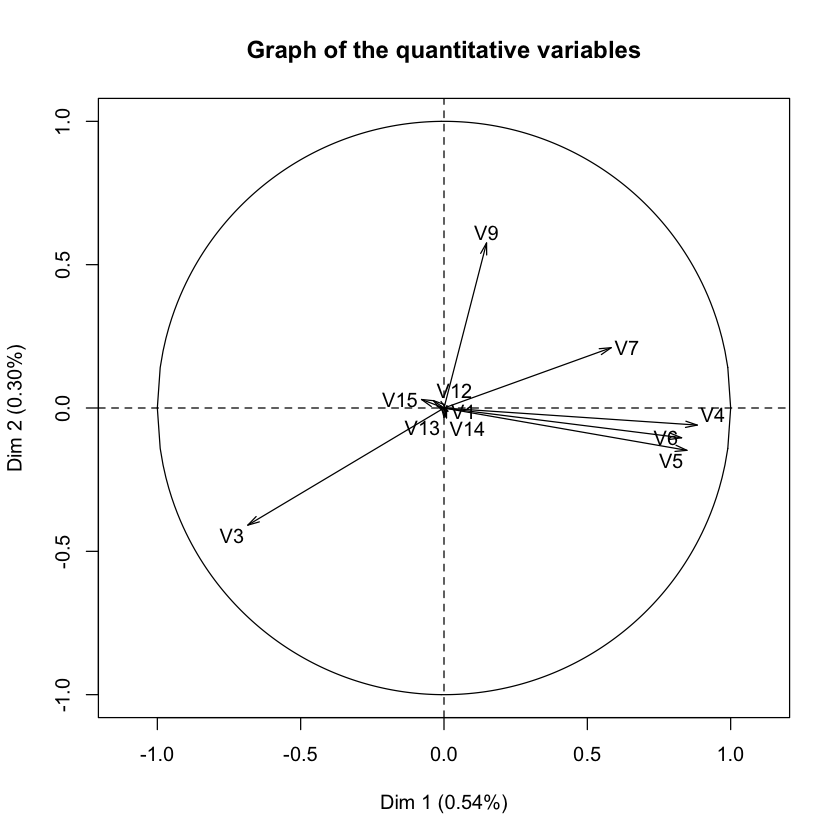

In [9]:
library(FactoMineR)
res.famd <- FAMD(df2, graph = FALSE)
eig.val <- res.famd$eig

barplot(eig.val[, 2], 
        names.arg = 1:nrow(eig.val), 
        main = "Variances Explained by Dimensions (%)",
        xlab = "Principal Dimensions",
        ylab = "Percentage of variances",
        col ="steelblue")

# Add connected line segments to the plot
lines(x = 1:nrow(eig.val), eig.val[, 2], 
      type = "b", pch = 19, col = "red")

plot(res.famd, choix = "var")
plot(res.famd, choix = "quanti")
summary(res.famd)


Call:
lm(formula = V13 ~ V14, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.2443 -1.2335 -0.0014  1.7737  4.8132 

Coefficients:
             Estimate Std. Error  t value Pr(>|t|)    
(Intercept) 1.422e-03  5.326e-03    0.267     0.79    
V14         3.594e-03  3.211e-06 1119.528   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.654 on 780827 degrees of freedom
Multiple R-squared:  0.6161,	Adjusted R-squared:  0.6161 
F-statistic: 1.253e+06 on 1 and 780827 DF,  p-value: < 2.2e-16


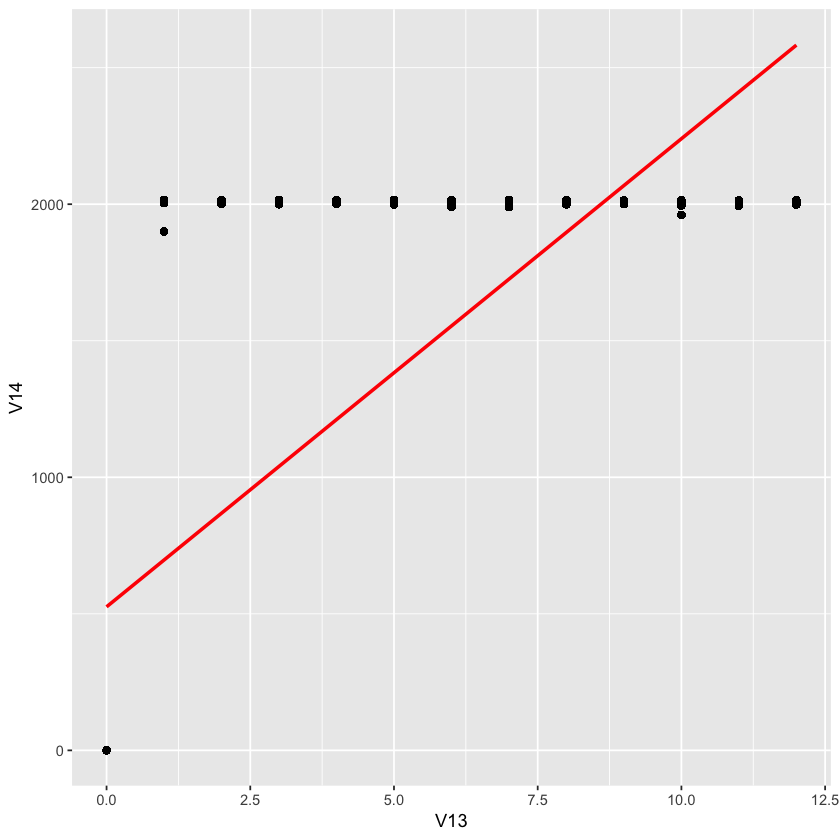

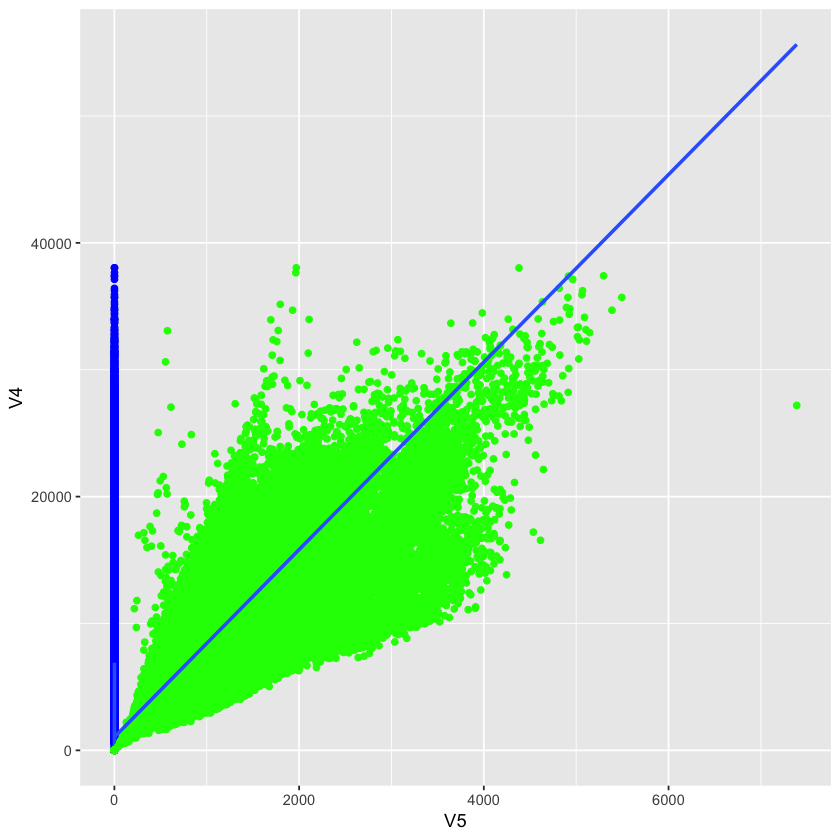

In [10]:
#some linear models
l1 <- lm(V13 ~ V14, data=df)
summary(l1)

ggplot(df, aes(x = V13, y = V14)) + 
  geom_point() +
  stat_smooth(method = "lm", col = "red")

ggplot(df) + 
  geom_jitter(aes(V5,V4), colour="blue") + geom_smooth(aes(V5,V4), method=lm, se=FALSE) +
  geom_jitter(aes(V6,V4), colour="green") + geom_smooth(aes(V6,V4), method=lm, se=FALSE)

In [11]:
#variables
colnames(df)[1] <- "store_id"
colnames(df)[2] <- "date"
colnames(df)[3] <- "day_of_the_week"
colnames(df)[4] <- "sales"
colnames(df)[5] <- "store_status"
colnames(df)[6] <- "customers"
colnames(df)[7] <- "discount"
colnames(df)[8] <- "holiday"
colnames(df)[9] <- "competitor"
colnames(df)[10] <- "brand"
colnames(df)[11] <- "product"
colnames(df)[12] <- "competitor_id"
colnames(df)[13] <- "month_comp1"
colnames(df)[14] <- "year_comp1"
colnames(df)[15] <- "marketing_campaign"

write.csv(df, "god.csv")